In [1]:
import geopandas as gpd
import contextily as cx

In [2]:
df = gpd.read_file("data/catalog.csv")
df.keys()

Index(['EMSR', 'AOI', 'folder', 'folderPath', 'activationDate',
       'interval_startDate', 'interval_endDate', 'post_fire_acquisition',
       'GRA', 'DEL', 'FEP', 'left_Long', 'bottom_Lat', 'right_Long', 'top_Lat',
       'centerBoxLong', 'centerBoxLat', 'resolution_x', 'resolution_y',
       'height', 'width', 'pixelBurned', 'country', 'koppen_group',
       'koppen_subgroup', 'geometry'],
      dtype='object')

In [3]:
df[["centerBoxLong","centerBoxLat"]]

,centerBoxLong,centerBoxLat
0,-8.270613886693225,39.82683231491534
1,-8.03823813831385,39.82683231491534
2,-7.805862389934477,39.95533195610306
3,-8.03823813831385,39.95533195610306
4,-8.03823813831385,40.08383159729076
...,...,...
558,-72.22851841461339,-36.16031186870902
559,-72.57300674169554,-36.16031186870902
560,-72.40076257815446,-36.31264729126937
561,-72.40076257815446,-36.16031186870902


In [5]:
cat_emsrs = df[df["folder"] == "optimal"]["EMSR"].values.tolist()

In [6]:
import glob
glob.glob("data/ems/val/*")

['data/ems/val/EMSR353',
 'data/ems/val/EMSR440',
 'data/ems/val/EMSR544',
 'data/ems/val/EMSR401',
 'data/ems/val/EMSR220',
 'data/ems/val/EMSR619',
 'data/ems/val/EMSR529',
 'data/ems/val/EMSR607',
 'data/ems/val/EMSR533',
 'data/ems/val/EMSR528',
 'data/ems/val/EMSR633',
 'data/ems/val/EMSR560',
 'data/ems/val/EMSR605',
 'data/ems/val/EMSR600',
 'data/ems/val/EMSR443']

In [7]:
import glob
train = []
for entry in glob.iglob("data/ems/train/*"):
    act = entry.split("/")[-1]
    train.append(act)
    if act not in cat_emsrs:
        print("WARNING: {} not in catalog".format(act))

val = []
for entry in glob.iglob("data/ems/val/*"):
    act = entry.split("/")[-1]
    val.append(act)
    if act not in cat_emsrs:
        print("WARNING: {} not in catalog".format(act))

test = []
for entry in glob.iglob("data/ems/test/*"):
    act = entry.split("/")[-1]
    test.append(act)
    if act not in cat_emsrs:
        print("WARNING: {} not in catalog".format(act))

In [8]:


train_points_x = []
train_points_y = []
val_points_x = []
val_points_y = []
test_points_x = []
test_points_y = []
heights = []
widths = []
dims = []
train_sizes = []
val_sizes = []
test_sizes = []
colors = []
labels = []

ts = 0
vs = 0
tes = 0

# red for train
# blue for val
# green for test


for row in df[["EMSR", "centerBoxLong","centerBoxLat", "height", "width"]].iterrows():
    emsr = row[1].values[0]
    dims = float(row[1].values[3]) *float(row[1].values[4])
    if emsr in train:
        colors.append("red")
        ts += 1
        labels.append("train")
        train_points_x.append(float(row[1].values[1]))
        train_points_y.append(float(row[1].values[2]))
        train_sizes.append(dims/3949034.0 * 50)
    elif emsr in val:
        colors.append("blue")
        labels.append("val")
        vs += 1
        val_points_x.append(float(row[1].values[1]))
        val_points_y.append(float(row[1].values[2]))
        val_sizes.append(dims/3949034.0 * 50)
    elif emsr in test:
        colors.append("green")
        labels.append("train")
        test_points_x.append(float(row[1].values[1]))
        test_points_y.append(float(row[1].values[2]))
        test_sizes.append(dims/3949034.0 * 50)
        tes += 1
    
    
    # print(x)
    # new_x, new_y = transformer.transform(x, y)
    # points_x.append(new_x)
    # points_y.append(new_y)

In [8]:
tes + ts + vs

563

In [9]:
len(df)

563

In [128]:
max(dims)

3949034.0

In [129]:
min(dims)

278735.0

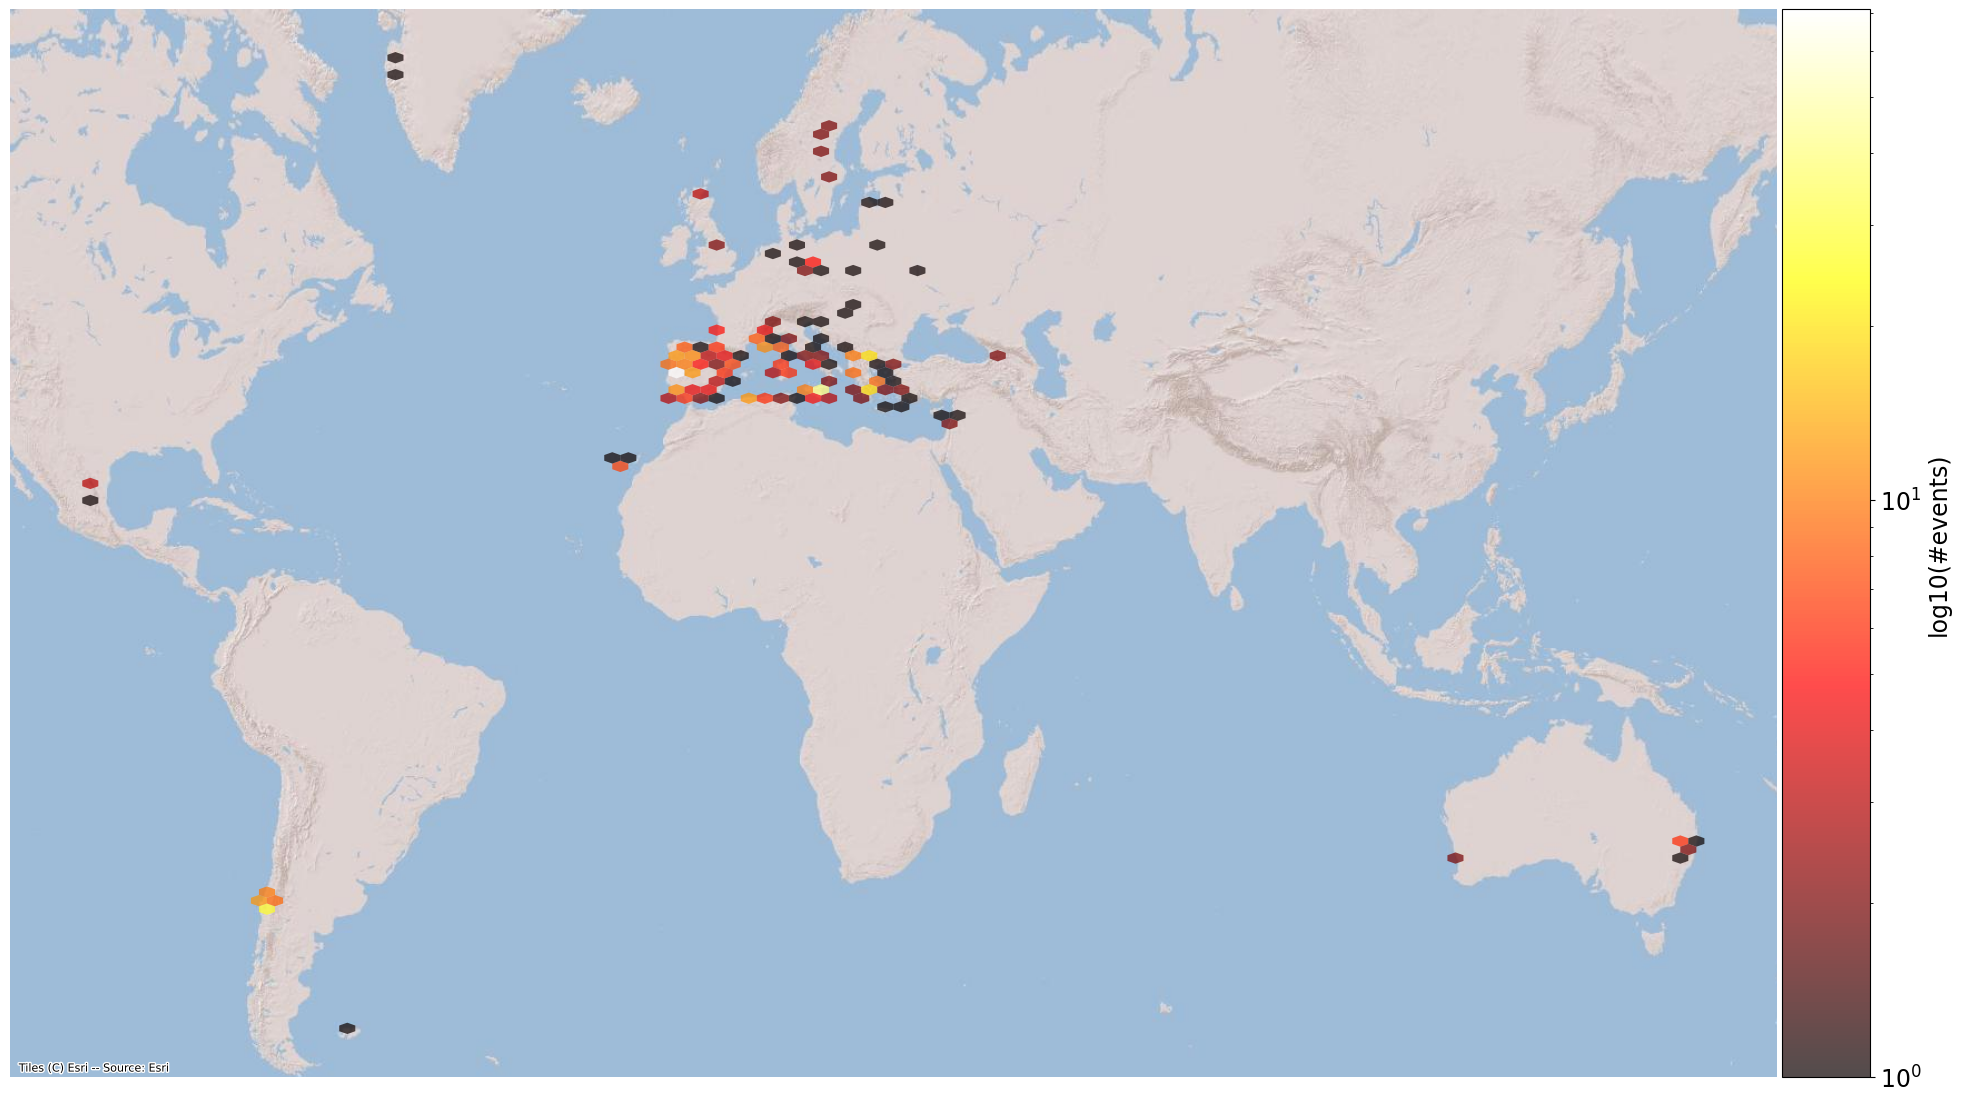

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from pyproj import Transformer

transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)
source = cx.providers.Esri.WorldShadedRelief
cmap = 'hot'
# europe_gray = np.load('/home/urbanelli/projects/hotspot-selection/figures/europe.npy')
# bounds = [[28.614355, 48.070685], [-12.958701, 70.366189]]

# bounds[0] = transformer.transform(*bounds[0])
# bounds[1] = transformer.transform(*bounds[1])

fig, ax = plt.subplots(figsize=(24, 18))
# ax.imshow(europe_gray, extent=(bounds[0], bounds[2], bounds[1], bounds[3]))  # left, right, bottom, top
xs=points_x
ys=points_y
xs, ys = transformer.transform(xs, ys)
gridsize = 100
bar = ax.hexbin(xs, ys, gridsize=gridsize, alpha=0.7, edgecolors='none',
                # extent=(bounds[1][0], bounds[0][1], bounds[0][0], bounds[1][1]),
                mincnt=1, cmap=cmap, bins='log')
cx.add_basemap(ax, crs='epsg:3857', source=source)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(bar, cax=cax)
for t in cbar.ax.get_yticklabels():
    t.set_fontsize(17)
cbar.set_label('log10(#events)', fontsize=17)
ax.set_axis_off()
plt.show()

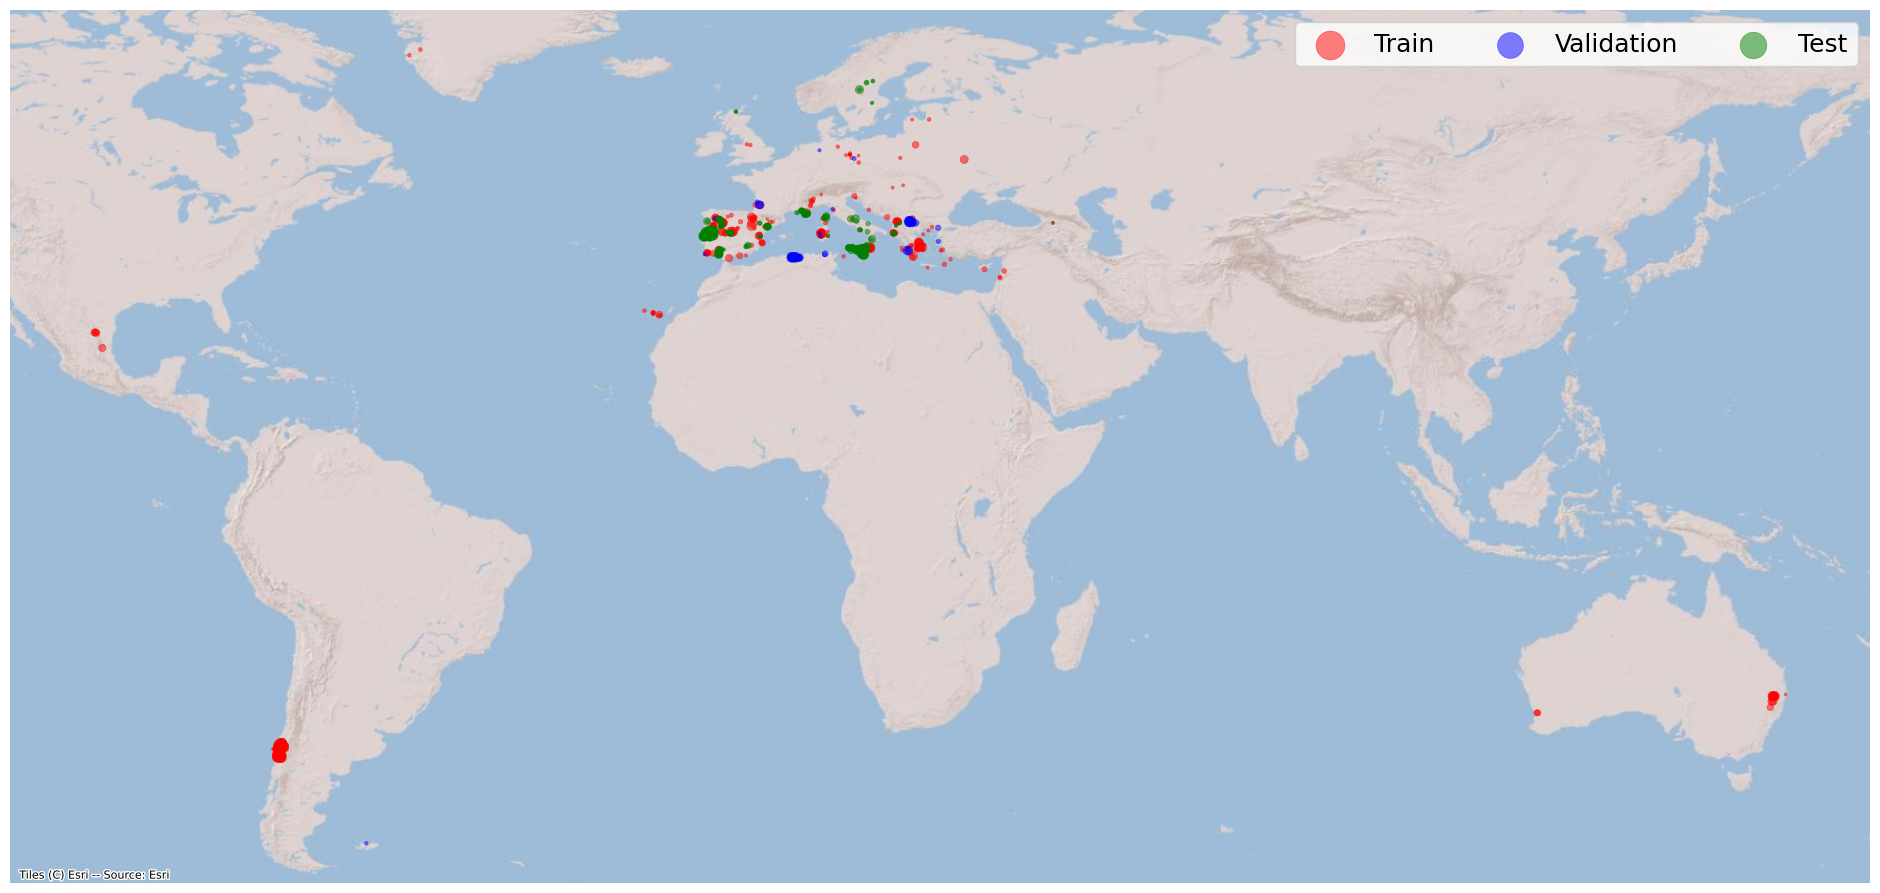

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx

# Create a scatter plot of the points
fig, ax = plt.subplots(figsize=(24, 18))

scatter_train = ax.scatter(train_points_x, train_points_y, color="red", zorder=5, linewidths=0.5, alpha=0.5, s=train_sizes)
scatter_val = ax.scatter(val_points_x, val_points_y, color="blue", zorder=5, linewidths=0.5, alpha=0.5, s=val_sizes)
scatter_test = ax.scatter(test_points_x, test_points_y, color="yellow", zorder=5, linewidths=0.5, alpha=0.5, s=test_sizes)

# Add map tiles from contextily
ctx.add_basemap(ax=plt.gca(), crs='EPSG:4326', source=ctx.providers.Esri.WorldShadedRelief)
plt.legend((scatter_train, scatter_val, scatter_test),
           ('Train', 'Validation', 'Test'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           markerscale=4,
           fontsize=18)

plt.axis('off')
# Show the plot
plt.show()



In [76]:
df

,EMSR,AOI,folder,folderPath,activationDate,interval_startDate,interval_endDate,post_fire_acquisition,GRA,DEL,...,centerBoxLat,resolution_x,resolution_y,height,width,pixelBurned,country,koppen_group,koppen_subgroup,geometry
0,EMSR207,AOI01,optimal,dataOptimal/EMSR207/AOI01/EMSR207_AOI01_01,2017-06-20T00:00:00.000,2017-06-20T10:00:00Z,2017-07-05T10:00:00Z,2017/07/04_11:24:31,1,1,...,39.82683231491534,0.00011753957935224,-8.911209513711e-05,1442,1977,901978,Portugal,C,Csa,None
1,EMSR207,AOI01,optimal,dataOptimal/EMSR207/AOI01/EMSR207_AOI01_04,2017-06-20T00:00:00.000,2017-06-20T10:00:00Z,2017-07-05T10:00:00Z,2017/07/04_11:24:31,1,1,...,39.82683231491534,0.00011777787550906,-8.874284612411e-05,1448,1973,2629,Portugal,C,Csa,None
2,EMSR207,AOI01,optimal,dataOptimal/EMSR207/AOI01/EMSR207_AOI01_08,2017-06-20T00:00:00.000,2017-06-20T10:00:00Z,2017-07-05T10:00:00Z,2017/07/04_11:24:31,1,1,...,39.95533195610306,0.00011819722704953,-8.843746812643e-05,1453,1966,60675,Portugal,C,Csb,None
3,EMSR207,AOI01,optimal,dataOptimal/EMSR207/AOI01/EMSR207_AOI01_05,2017-06-20T00:00:00.000,2017-06-20T10:00:00Z,2017-07-05T10:00:00Z,2017/07/04_11:24:31,1,1,...,39.95533195610306,0.00011795723267989,-8.874284612411e-05,1448,1970,652165,Portugal,C,Csa,None
4,EMSR207,AOI01,optimal,dataOptimal/EMSR207/AOI01/EMSR207_AOI01_06,2017-06-20T00:00:00.000,2017-06-20T10:00:00Z,2017-07-05T10:00:00Z,2017/07/04_11:24:31,1,1,...,40.08383159729076,0.00011819722704953,-8.874284612411e-05,1448,1966,981581,Portugal,C,Csb,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,EMSR647,AOI07,optimal,dataOptimal/EMSR647/AOI07/EMSR647_AOI07_06,2023-02-07T10:30:00.000,2023-02-16T10:30:00Z,2023-02-18T10:30:00Z,2023/02/17_14:52:48,0,1,...,-36.16031186870902,0.00010778733638365,-9.254885939268e-05,1646,1598,315892,Chile,C,Csb,None
559,EMSR647,AOI07,optimal,dataOptimal/EMSR647/AOI07/EMSR647_AOI07_02,2023-02-07T10:30:00.000,2023-02-16T10:30:00Z,2023-02-18T10:30:00Z,2023/02/17_14:52:49,0,1,...,-36.16031186870902,0.00010819357006348,-9.226857817102e-05,1651,1592,321013,Chile,C,Csb,None
560,EMSR647,AOI07,optimal,dataOptimal/EMSR647/AOI07/EMSR647_AOI07_03,2023-02-07T10:30:00.000,2023-02-16T10:30:00Z,2023-02-18T10:30:00Z,2023/02/17_14:53:02,0,1,...,-36.31264729126937,0.00010819357006349,-9.238048669518e-05,1649,1592,1229561,Chile,C,Csb,None
561,EMSR647,AOI07,optimal,dataOptimal/EMSR647/AOI07/EMSR647_AOI07_04,2023-02-07T10:30:00.000,2023-02-16T10:30:00Z,2023-02-18T10:30:00Z,2023/02/17_14:52:48,0,1,...,-36.16031186870902,0.00010799007118563,-9.238048669518e-05,1649,1595,251234,Chile,C,Csb,None


In [94]:
import rasterio
import os
pixels_0 = 0
pixels_1 = 1
for row in df.iterrows():
    folder = row[1].values[3]
    name = folder.split("/")[-1]
    map = os.path.join("/nfs/home/barco/data/cems", folder , name + "_DEL.tif")
    print(map)
    with rasterio.open(map) as src:
        img = src.read(1)
        pixels_0 += (img == 0).sum()
        pixels_1 += (img == 1).sum()

/nfs/home/barco/data/cems/dataOptimal/EMSR207/AOI01/EMSR207_AOI01_01/EMSR207_AOI01_01_DEL.tif


RasterioIOError: /nfs/home/barco/data/cems/dataOptimal/EMSR207/AOI01/EMSR207_AOI01_01/EMSR207_AOI01_01_DEL.tif: No such file or directory

In [47]:
import os
import os.path as osp
from pathlib import Path
import rasterio

def count_pos_neg(folder):
    pos = 0
    neg = 0
    for act in os.listdir(folder):
        # print(act)
        if osp.isdir(folder/act):
            for aoi in os.listdir(folder/act):
                if osp.isdir(folder/act/aoi):
                    for subaoi in os.listdir(folder/act/aoi):
                        if osp.isfile(folder/act/aoi/subaoi/f"{subaoi}_DEL.tif"):
                            with rasterio.open(folder/act/aoi/subaoi/f"{subaoi}_DEL.tif") as src:
                                img = src.read(1)
                                pos += (img == 1).sum()
                                neg += (img == 0).sum()
    return pos, neg
                            
p_train, n_train = count_pos_neg(Path("data/ems/train"))
p_val, n_val = count_pos_neg(Path("data/ems/val"))
p_test, n_test = count_pos_neg(Path("data/ems/test"))

In [48]:
p_train, n_train, p_val, n_val, p_test, n_test

(108116246, 368721754, 13963630, 89929058, 15314518, 160416627)

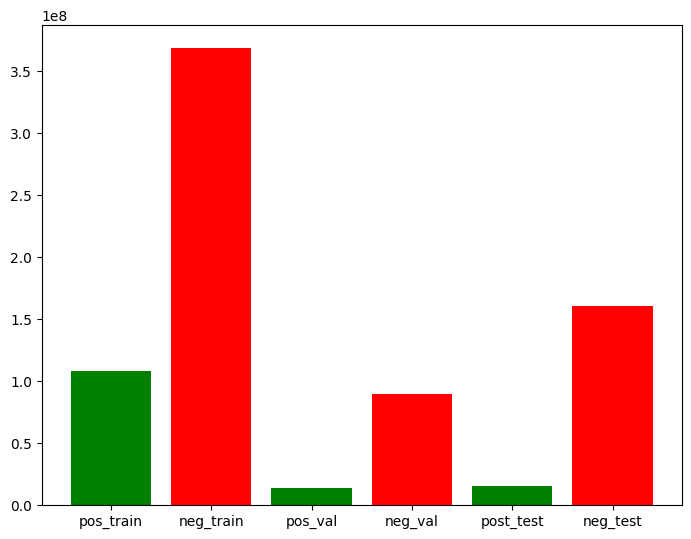

In [49]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(["pos_train", "neg_train", "pos_val", "neg_val", "post_test", "neg_test"],[p_train, n_train, p_val, n_val, p_test, n_test], color=['green', 'red'])
plt.show()

In [50]:
perc_pos_train = (p_train / (p_train + n_train)) * 100
perc_pos_val = (p_val / (p_val + n_val)) * 100
perc_pos_test = (p_test / (p_test + n_test)) * 100
perc_pos_tot = ((p_train + p_val + p_test) / (p_train + p_val + p_test + n_train + n_val + n_test)) * 100

In [51]:
(perc_pos_train, perc_pos_val, perc_pos_test, perc_pos_tot)   

(22.673580125745012, 13.440435769647236, 8.714743194782008, 18.162766184133446)

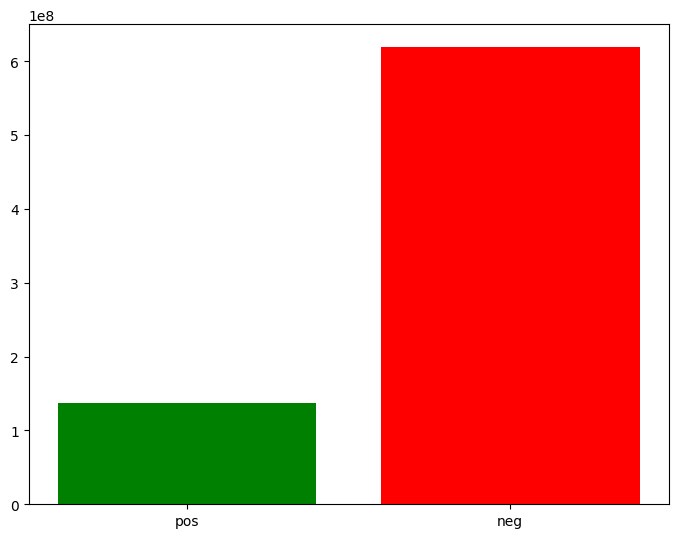

In [52]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(["pos", "neg"],[p_train + p_val + p_test, n_train+ n_val+ n_test], color=['green', 'red'])
plt.show()

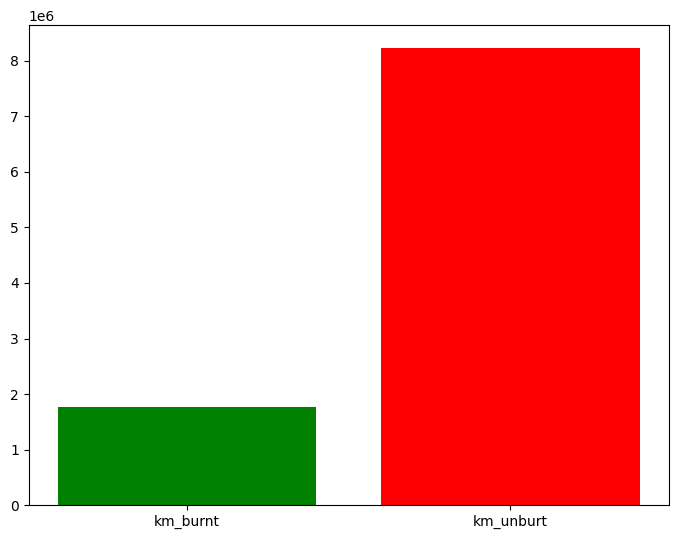

In [118]:

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(["km_burnt", "km_unburt"],[(p_train + p_val + p_test) / 100, (n_train+ n_val+ n_test) / 100], color=['green', 'red'])
plt.show()